# Insurance Price Prediction

dataset link : https://www.kaggle.com/sonujha090/insurance-prediction

Data contain information of the people and based on this how much insurance company charge to insure them.
Column names : 
- Age
- Sex
- BMI
- Children
- Smokers
- Region
- Charges

Objective is to predict the insurance charges for the new people based on the information we will get from them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
data.shape

(348, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


# EDA

1    177
0    171
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='charges'>

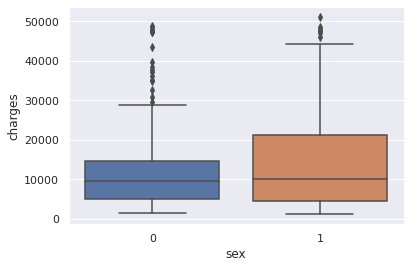

In [6]:
# gender column 0:female and 1:male

print(data['sex'].value_counts())
sns.boxplot(x='sex', y='charges', data=data)

0    267
1     81
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='charges'>

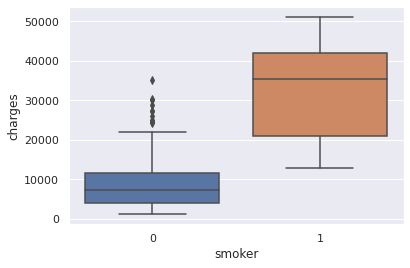

In [7]:
# smoker column 0 : not smoker and 1 : smoker

print(data['smoker'].value_counts())
sns.boxplot(x='smoker', y='charges', data=data)

if you are smoker then with the help of graph we can say that your premium is very high.

2    95
0    86
1    85
3    82
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='Count'>

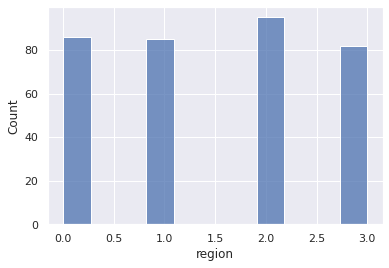

In [8]:
# region column

print(data['region'].value_counts())
sns.histplot(data=data['region'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

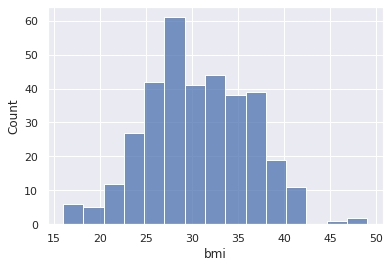

In [13]:
# bmi : body mass index column

sns.histplot(data=data, x='bmi')

<AxesSubplot:>

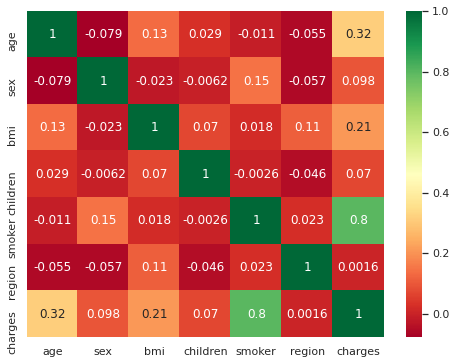

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(), annot = True, cmap = "RdYlGn")

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [23]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X, y)

ExtraTreesRegressor()

In [24]:
print(et.feature_importances_)

[0.13187242 0.01183194 0.17411984 0.02368813 0.63766156 0.0208261 ]


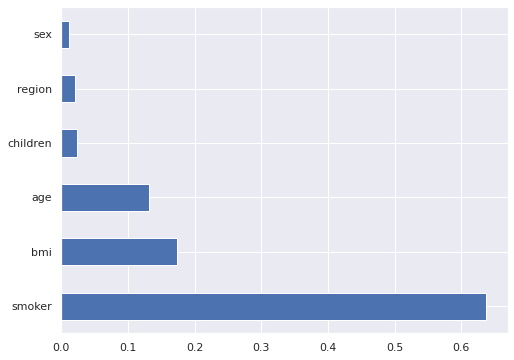

In [26]:
# here smoker column is very important

plt.figure(figsize = (8,6))
feat_importances = pd.Series(et.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting model using Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = reg_rf.predict(X_test)

In [30]:
reg_rf.score(X_train, y_train)

0.9783837373865406

In [31]:
reg_rf.score(X_test, y_test)

0.8587842476846913

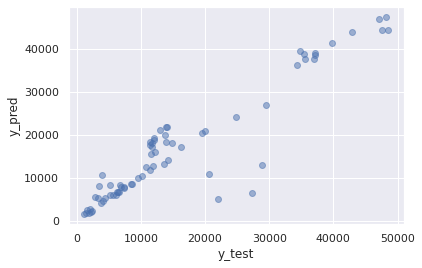

In [32]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3031.9065365671436
MSE: 25590382.46207802
RMSE: 5058.693750572179


In [34]:
metrics.r2_score(y_test, y_pred)

0.8587842476846913

# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [37]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [38]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [41]:
prediction = rf_random.predict(X_test)

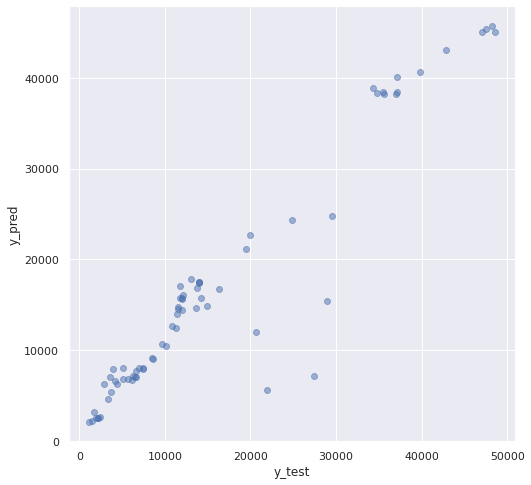

In [42]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2733.006202374167
MSE: 19012135.62380261
RMSE: 4360.290772850201
